In [ ]:
#PCA is a linear transformation technique
#its purpose is to identify patterns and finding patterns to reduce the dim of the dataset with minimal losss of info
#outcome of PCA is to project a featture space onto a smaller subspace that represents outr data "well"
#A possible application is pattern classificationtask,where we want to reduce the com[utational cost and the error of parameter estimtion by reducing the num of dim of our feature space by extracting a subspace that describe our data "best".


In [ ]:
#PCA VS MDA(Multiple Discriminant Analyysis)
#both are linear transformation methods and related to each other
#roughly speaking in PCA we are trying to find the axes with maximum variances where the data is most spread (within a class, since PCA treats the whole data set as one class), and in MDA we are additionally maximizing the spread between classes.


In [ ]:
#in PCA we work with eigenvector where we compute these eigenvector (the components) from our data set and collect them in a so-called scatter-matrix (or alternatively calculate them from the covariance matrix).
#Each of those eigenvectors is associated with an eigenvalue, which tell us about the “length” or “magnitude” of the eigenvectors.
#If we observe that all the eigenvalues are of very similar magnitude, this is a good indicator that our data is already in a “good” subspace.
#if some of the eigenvalues are much much higher than others, we might be interested in keeping only those eigenvectors with the much larger eigenvalues, since they contain more information about our data distribution.
#eigenvalues that are close to 0 are less informative and we might consider in dropping those when we construct the new feature subspace.



In [ ]:
#PCA approach

#-Take thewhole dataset consisting of d-dim samples ignoring the class label
#-compute the d-dim mean vector(the means of every dim of the whole dataset
#-compute the scsler matrix(covariance matrix) of the whole dataset
#-Compute eigenvectors (e1,e2,...,ed) and corresponding eigenvalues (λ1,λ2,...,λd)
#-sort the eigenvector with decreasing eigenvalue and choose K eigenvectors with the largest eigenvalue to form a d*k dim matrix called W
#-Use this d×k eigenvector matrix to transform the samples onto the new subspace. This can be summarized by the mathematical equation: y=W^T×x
#(where x is a d×1-dimensional vector representing one sample, and y is the transformed k×1-dimensional sample in the new subspace.)


In [ ]:
#creating a 3-dim sample data
import numpy as np

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1 , cov_mat1 , 20).T
assert class1_sample.shape==(3,20)

import numpy as np

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2 , cov_mat2 , 20).T
assert class2_sample.shape==(3,20)

#we have created two 3*20 datasets-one datasets of each  ω1 and ω2 -
#where each column can be pictured as a 3-dimensional vector



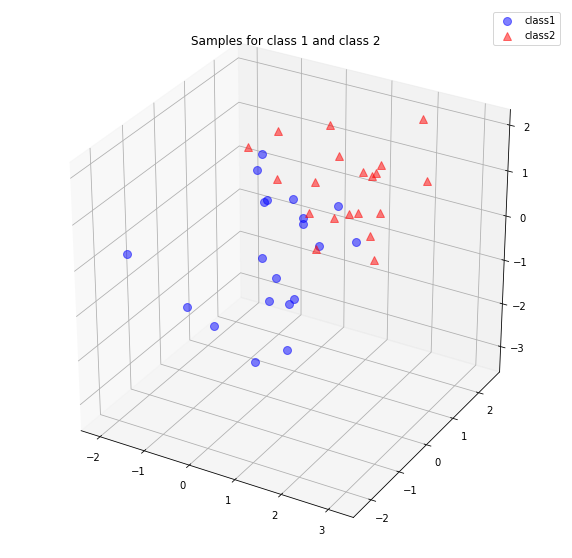

In [ ]:
#ploting the sample of two classes ω1 and ω2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

#1. Taking the whole dataset ignoring the class labels

In [ ]:
#as we dont need class labels for the PCA  analysis.
all_samples = np.concatenate((class1_sample , class2_sample),axis=1)
assert all_samples.shape == (3,40)
all_samples

array([[ 0.71975986,  0.15417478,  0.49940095,  1.22679527, -0.61053534,
        -1.0244855 ,  0.98937494,  0.55971623,  0.61400427,  1.66885547,
         1.26984326,  0.83629538, -1.57796474, -2.05190836,  1.04995043,
        -0.77392745, -0.34623349, -0.44427885, -0.60865083, -0.21969899,
         1.85263913,  1.62339602,  1.56606159,  1.24284179,  0.90866606,
         2.52400324,  1.88079981,  0.86180121,  0.79509318,  1.05685588,
         1.76037983,  3.14778876,  0.8341663 ,  1.10675854, -0.53712852,
         0.69418587, -0.10022599,  0.52327753,  1.50354493,  1.77212304],
       [ 0.70418819,  1.04098479, -0.90768789, -2.26935052,  0.67629094,
         1.5300976 , -0.58178651, -0.74627   ,  1.54524084,  0.48641546,
        -1.61877265, -0.37168555, -0.31447136, -1.50894088, -0.38119848,
        -0.60477084,  0.43627294,  1.44515044,  1.00887102,  1.15625005,
         0.85248848,  0.75872501,  0.37146599,  1.74178965,  0.2525284 ,
         1.57117506,  2.48519784,  0.1183167 ,  0.

#computing the d-dim mean vector

In [ ]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mean_vector = np.array([[mean_x],[mean_y],[mean_z]])
print('mean vector::\n', mean_vector)


mean vector::
 [[0.67368789]
 [0.41287511]
 [0.37221877]]


#Computing the scatter matrix

In [ ]:
#the scatter matrix is computed by equation:S=∑ n to k=1(x to base k−m)(x to base k−m)^T
#where mm is the mean vector
#m=1/n∑ n to k x to base k

scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[46.14209932  3.88643243 21.01816915]
 [ 3.88643243 46.71742444  6.92595716]
 [21.01816915  6.92595716 60.08439588]]


#computing the covariane matrix

In [ ]:
cov_mat = np.cov([all_samples[0,:],all_samples[1,:],all_samples[2,:]])
print('Covariance Matrix:\n', cov_mat)

Covariance Matrix:
 [[1.18313075 0.09965211 0.53892741]
 [0.09965211 1.19788268 0.17758865]
 [0.53892741 0.17758865 1.54062554]]


#computing eigenvectors and eigenvalues

In [ ]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)


In [ ]:
#eigenvectors are indeed identical whether we derived them from the scatter or the covariance matrix
for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T
    assert eigvec_sc.all() == eigvec_cov.all()

In [ ]:
eigvec_sc.all() == eigvec_cov.all()

True

In [ ]:
eigvec_sc[i]

array([0.16545188])

In [ ]:
eigvec_cov[i]

array([0.16545188])

In [ ]:
#Scaling factor
print(eig_val_sc[i]/eig_val_cov[i])

39.0


In [ ]:
#Checking the eigenvector-eigenvalue calculation
#check that the eigenvector-eigenvalue calculation is correct and satisfy this equation :Σv=λv
#where:

# Σ=Covariance matrix
# v=Eigenvector
# λ=Eigenvalue

for i in range(len(eig_val_sc)):
  eigv = eig_vec_sc[:,i].reshape(1,3).T
  np.testing.assert_array_almost_equal(scatter_matrix.dot(eigv),eig_val_sc[i]*eigv,decimal=6,err_msg='',verbose=True)


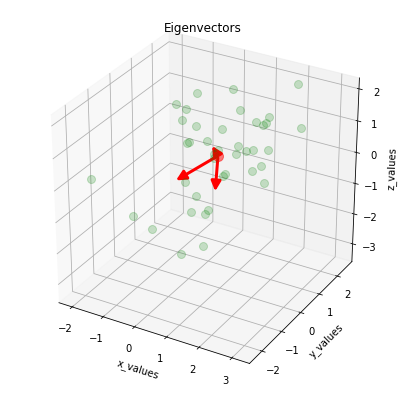

In [ ]:
#visulizing the eigenvectors

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

#sorting the eigenvectors by decreasing eigenvalues


In [ ]:
#as we know the goal is to project the feature space via PCA. onto a smaller subspace .
#however, the eigenvetors only define the direction of the new axis, since they have all the same unit lenght 1
#which we can confirm by the following code:
for ev in eig_vec_sc:
  np.testing.assert_array_almost_equal(1.0,np.linalg.norm(ev))

In [ ]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

77.29460446937448
44.73673863729173
30.912576526194048


#choosing K eigenvectors with the largest eignvalues


In [ ]:
#as we are reeducing a 3-dim feature space to a 2-din feature subspace ,we are combining the two eigenvectors with the highest eigenvalues to construct our d*k dim eigenvector matrix W

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.56277408  0.19757794]
 [ 0.24999528 -0.9662239 ]
 [ 0.78790082  0.16545188]]


#Transforming the samples onto new subspace

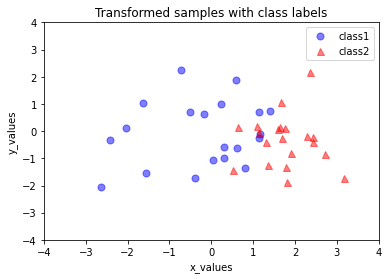

In [ ]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

#Visualization
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [ ]:
#Using the PCA() class from the sklearn.decomposition library to confirm our results

In [ ]:
link: http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.